In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Directory containing your HDF5 files
dir_path = './in/data/lf/v1.1/run/run/run'

signal_counts = []
background_counts = []
signal_ratios = []

# Loop over HDF5 files
for filename in os.listdir(dir_path):
    if filename.endswith('.h5'):
        file_path = os.path.join(dir_path, filename)
        with h5py.File(file_path, 'r') as hdf:
            target = hdf['target'][:,[1]]
            #print(target)
            signals = np.sum(target == 1)
            print(signals)
            backgrounds = np.sum(target != 1)
            signal_counts.append(signals)
            background_counts.append(backgrounds)
            signal_ratios.append(signals / len(target))




25
3
1
0
3
3
4
0
3
2
4
4
3
2
8
5
2
4
2
12
2
8
2
2
4
2
16
2
18
3
1
6
17
3
6
2
10
5
3
2
2
3
5
2
2
3
15
2
21
2
1
2
5
4
0
0
8
11
1
14
5
9
0
2
6
5
3
0
2
1
2
1
4
9
20
9
2
0
11
0
11
2
2
12
0
2
4
5
3
12
1
2
2
2
1
1
2
1
2
3
19
2
2
17
1
2
22
11
24
4
3
9
3
1
1
1
4
4
10
2
8
1
5
20
9
2
1
2
14
2
1
5
5
1
3
4
4
2
7
5
18
9
3
4
3
1
13
3
1
2
4
3
1
5
14
10
15
2
4
5
2
3
3
4
8
18
1
1
4
7
5
3
4
2
5
13
19
2
3
1
8
3
0
3
2
6
22
2
10
14
0
4
3
0
12
19
4
7
14
4
2
0
3
17
3
4
1
4
9
4
2
3
0
0
9
8
8
3
3
2
5
2
4
2
4
11
16
7
6
28
9
11
1
14
6
19
5
2
0
4
1
0
0
0
4
0
13
12
7
3
4
0
9
4
4
2
2
3
13
12
2
5
8
22
0
1
2
0
4
1
10
3
16
6
6
2
3
2
20
3
3
1
8
3
3
4
2
3
4
1
14
0
13
16
6
6
7
6
2
13
9
2
16
3
8
11
10
9
2
4
14
1
2
3
0
10
4
4
4
15
0
1
0
5
1
1
1
5
15
6
14
0
2
1
3
3
2
4
2
3
12
2
3
2
10
30
3
14
6
3
4
1
2
4
5
6
1
2
4
1
14
11
2
3
2
1
2
2
8
2
1
1
2
19
3
8
3
4
2
2
16
2
1
3
2
0
7
5
1
4
8
1
1
1
19
11
15
7
5
3
9
0
2
3
19
8
5
6
4
2
5
2
0
3
3
18
2
4
3
5
2
3164
6
0
3087
7
1
3
2
13
0
2
1
0
3
2
2
6
6
16
4
7
5
2
19
3
1
13
7
3
10
9
3
2
8
2


In [3]:
total_signals = np.sum(signal_counts)
total_backgrounds = np.sum(background_counts)
print(total_signals.shape, total_signals)
print(total_backgrounds.shape, total_backgrounds)
print(total_signals/total_backgrounds)

() 31666
() 4968334
0.006373565062252256


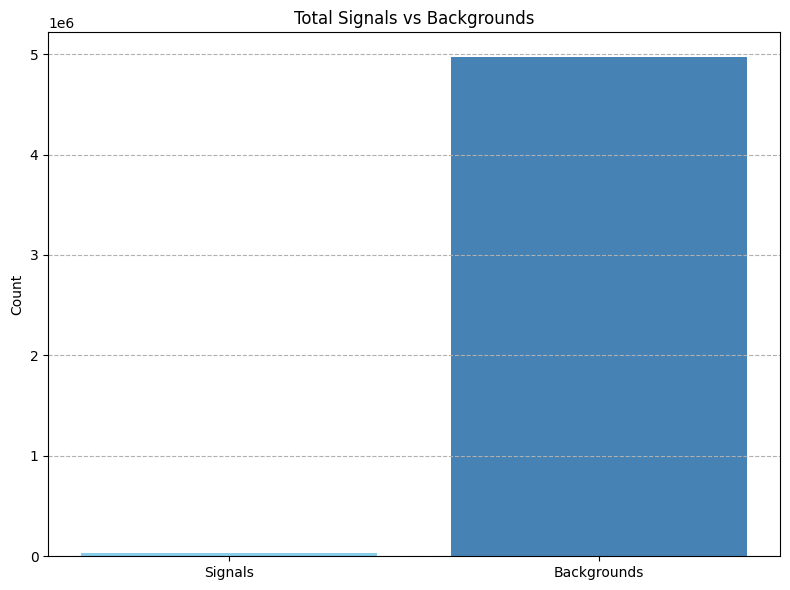

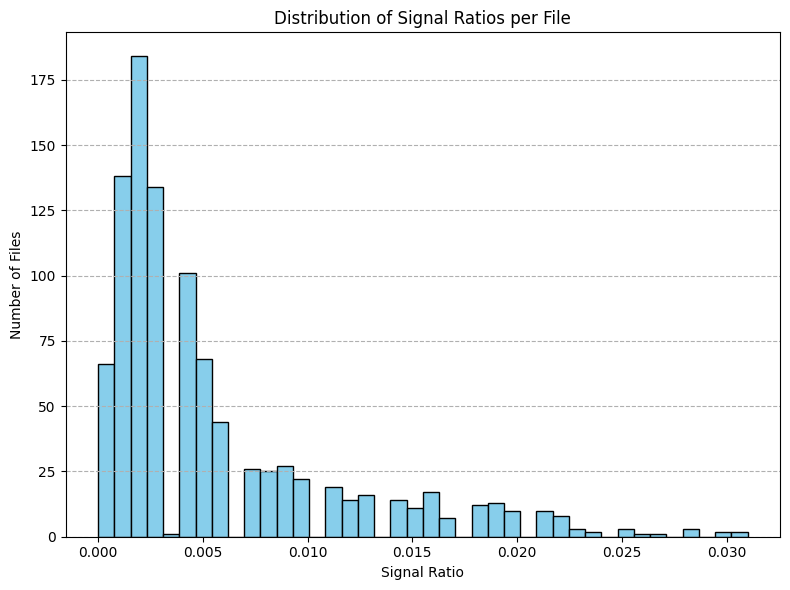

In [4]:
# Bar plot for total signals vs backgrounds
plt.figure(figsize=(8, 6))
plt.bar(['Signals', 'Backgrounds'], [total_signals, total_backgrounds], color=['skyblue', 'steelblue'])
plt.title('Total Signals vs Backgrounds')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Distribution of signal ratios per file
plt.figure(figsize=(8, 6))
plt.hist(signal_ratios, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Signal Ratios per File')
plt.xlabel('Signal Ratio')
plt.ylabel('Number of Files')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()